In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load data
print("\nLoading financial KPI dataset...")
df = pd.read_csv("financial_kpi_dataset.csv")
print(df.head())


Loading financial KPI dataset...
  Company_ID  Industry  P_E_Ratio    ROA    ROE  Debt_Equity  Current_Ratio  \
0  COMP_1000    Energy      25.82  0.067  0.175         1.45           0.94   
1  COMP_1001  Consumer      28.88  0.072  0.021         1.24           1.69   
2  COMP_1002   Finance      28.94  0.022  0.226         0.48           1.83   
3  COMP_1003  Consumer      27.55  0.128  0.251         0.78           0.43   
4  COMP_1004  Consumer      17.93  0.132  0.180         1.03           1.74   

   Net_Profit_Margin  Revenue_Growth  Risk_Score  
0              0.094           0.120           1  
1              0.106           0.131           1  
2              0.070           0.073           0  
3              0.129           0.130           1  
4              0.084           0.065           0  



Industry distribution:
Industry
Energy        25
Healthcare    19
Consumer      17
Utilities     17
Finance       11
Tech          11
Name: count, dtype: int64


/var/folders/bq/5vjrfz8d501bv3f9dl1qhwrm0000gn/T/ipykernel_37270/3525682487.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Industry', order=df['Industry'].value_counts().index, palette='Set2')


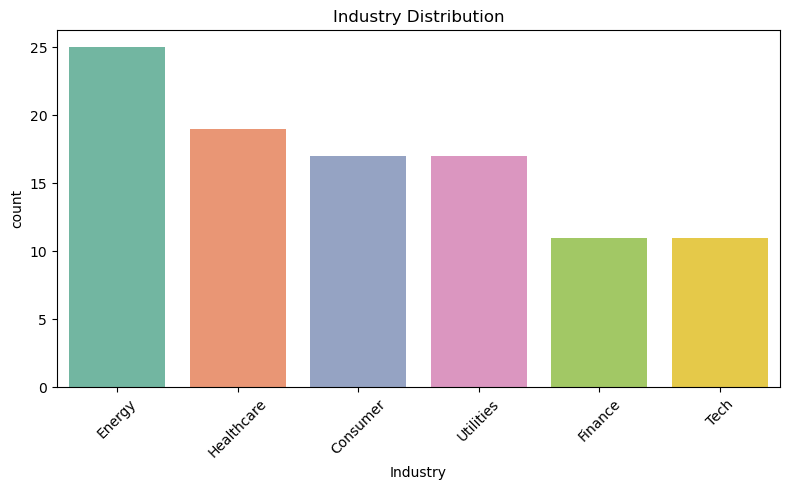

In [3]:
# =====================================
# 1. Industry Distribution
# =====================================
print("\nIndustry distribution:")
print(df['Industry'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Industry', order=df['Industry'].value_counts().index, palette='Set2')
plt.title('Industry Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


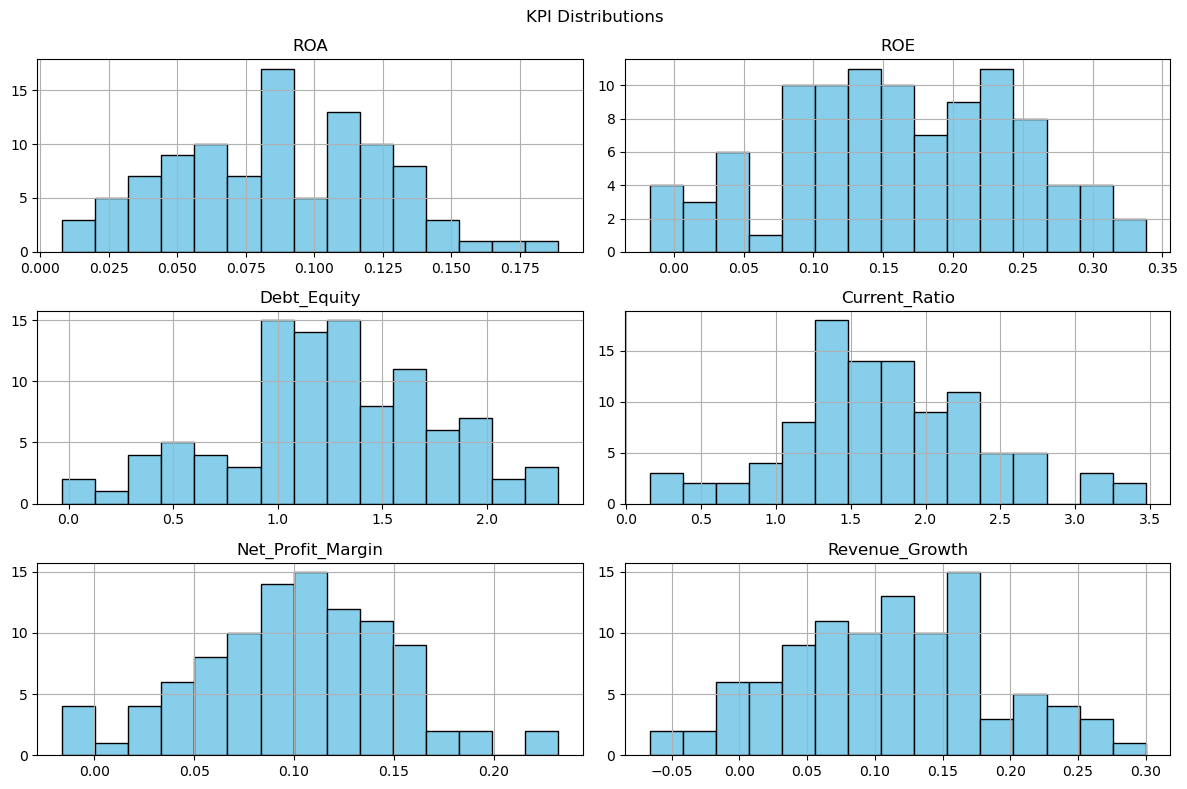

In [4]:
# =====================================
# 2. KPI Distributions
# =====================================
kpi_columns = ['ROA', 'ROE', 'Debt_Equity', 'Current_Ratio', 'Net_Profit_Margin', 'Revenue_Growth']
df[kpi_columns].hist(bins=15, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('KPI Distributions')
plt.tight_layout()
plt.show()

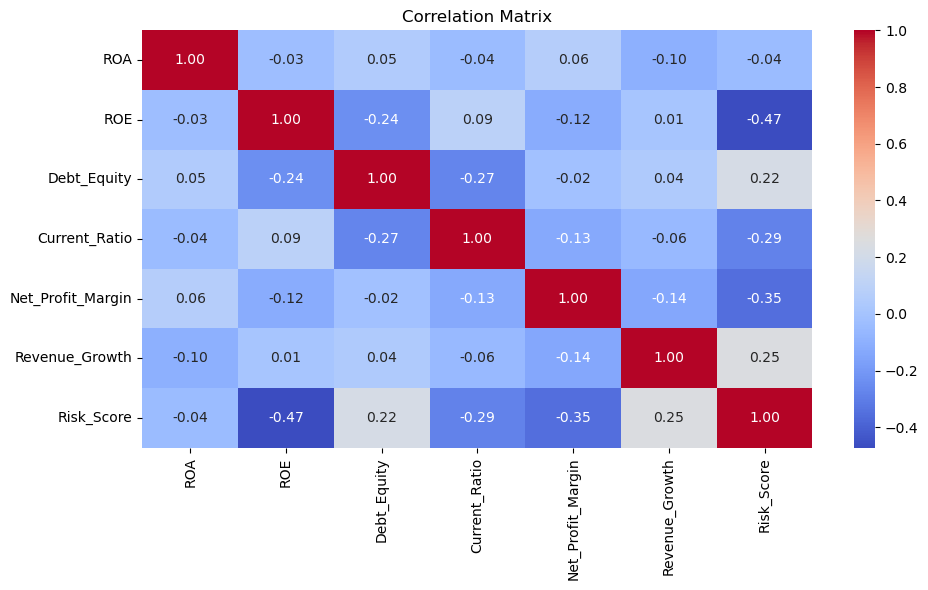

In [5]:
# =====================================
# 3. Correlation Heatmap
# =====================================
plt.figure(figsize=(10, 6))
sns.heatmap(df[kpi_columns + ['Risk_Score']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [6]:
# =====================================
# 4. Risk Classification Model
# =====================================
print("\nTraining financial risk classifier...")
features = kpi_columns
X = df[features]
y = df['Risk_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



Training financial risk classifier...


RandomForestClassifier(random_state=42)

In [7]:
# Evaluate model
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.82      0.90        11

    accuracy                           0.90        20
   macro avg       0.91      0.91      0.90        20
weighted avg       0.92      0.90      0.90        20


Confusion Matrix:
[[9 0]
 [2 9]]


/var/folders/bq/5vjrfz8d501bv3f9dl1qhwrm0000gn/T/ipykernel_37270/2732720745.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance.values, y=feat_importance.index, palette='Blues_d')


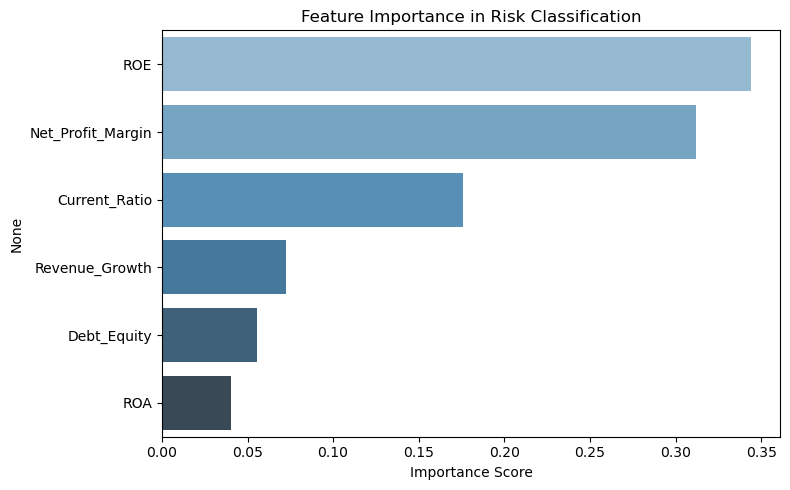

In [8]:
# Feature Importance
feat_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=feat_importance.values, y=feat_importance.index, palette='Blues_d')
plt.title('Feature Importance in Risk Classification')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()
